In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x=!unzip -uq "/content/drive/My Drive/dataset/dataset.zip"

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,MaxPool2D, Activation, BatchNormalization
from tensorflow.keras.preprocessing import image
from keras import optimizers
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import tensorflow.keras.backend as k
import cv2 
import os
from random import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [ ]:
train_data_dir=r"/content/train"
validation_data_dir=r"/content/test"
img_width, img_height = 128,128 
nb_train_sample =100
nb_validation_samples =100
input_shape=(img_width,img_height,3)
epochs=40  
batch_size=32


In [ ]:
def class_label(word_label):
    if word_label == 'Acne and Rosacea Photos': return 0
    elif word_label == 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': return 1
    elif word_label == 'Atopic Dermatitis Photos': return 2
    elif word_label == 'Bullous Disease Photos' : return 3
    elif word_label == 'Cellulitis Impetigo and other Bacterial Infections': return 4
    

In [ ]:
def create_train_data():
    training_data = []
    j=0
    for folder in sorted(os.listdir(train_data_dir)):
        i=0
        if j<=4:
          j+=1
          for img in (os.listdir(train_data_dir+"/"+folder)):
              i+=1
              path = (os.path.join(train_data_dir+"/"+folder,img))
              try:
                  label = class_label(folder)
                  img = cv2.imread(path)
                  img= cv2.resize(img, (img_width,img_height),interpolation=cv2.INTER_LINEAR)
                  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                  training_data.append([np.array(img),np.array(label)])
              
              except:
                  print(path)
    
              if i==1200:
                  break
              

    shuffle(training_data)
    return training_data

train_data = create_train_data()

In [ ]:
def create_test_data():
    test_data = []
    j=0
    for folder in sorted(os.listdir(validation_data_dir)):
        i=0
        if j<=4:
          j+=1
          for img in os.listdir(validation_data_dir+"/"+folder):
              i+=1
              path = os.path.join(validation_data_dir+"/"+folder,img)
              try:
                  label = class_label(folder)
                  img = cv2.imread(path)
                  img= cv2.resize(img, (img_width,img_height),interpolation=cv2.INTER_LINEAR)
                  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                  test_data.append([np.array(img),np.array(label)])
              
              except:
                  print(path)
              if i==200:
                  break
    shuffle(test_data)
    return test_data

test_data = create_test_data()

In [ ]:
train_y=np.array([i[1] for i in train_data])
train_x=np.array([i[0] for i in train_data]).reshape(-1,img_width, img_height,3)

train_x.shape

(3214, 128, 128, 3)

In [ ]:
test_y=np.array([i[1] for i in test_data])
test_x=np.array([i[0] for i in test_data]).reshape(-1,img_width, img_height,3)

test_x.shape


(709, 128, 128, 3)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2)


In [ ]:
data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

In [ ]:
model=Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 128, 128, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      504       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)       

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
training = model.fit(x_train,y_train,epochs=100,batch_size=20,validation_data=(x_test,y_test))

Epoch 1/100
129/129 [==============================] - 37s 25ms/step - loss: 1.5639 - accuracy: 0.3041 - val_loss: 1.5597 - val_accuracy: 0.3888
Epoch 2/100
129/129 [==============================] - 2s 19ms/step - loss: 1.5016 - accuracy: 0.3527 - val_loss: 1.4723 - val_accuracy: 0.4012
Epoch 3/100
129/129 [==============================] - 2s 19ms/step - loss: 1.4520 - accuracy: 0.4023 - val_loss: 1.4712 - val_accuracy: 0.3826
Epoch 4/100
129/129 [==============================] - 2s 19ms/step - loss: 1.4557 - accuracy: 0.3990 - val_loss: 1.4349 - val_accuracy: 0.4168
Epoch 5/100
129/129 [==============================] - 2s 19ms/step - loss: 1.4125 - accuracy: 0.4088 - val_loss: 1.4417 - val_accuracy: 0.4121
Epoch 6/100
129/129 [==============================] - 2s 19ms/step - loss: 1.3984 - accuracy: 0.4393 - val_loss: 1.4512 - val_accuracy: 0.3655
Epoch 7/100
129/129 [==============================] - 2s 19ms/step - loss: 1.3970 - accuracy: 0.4093 - val_loss: 1.4528 - val_accuracy

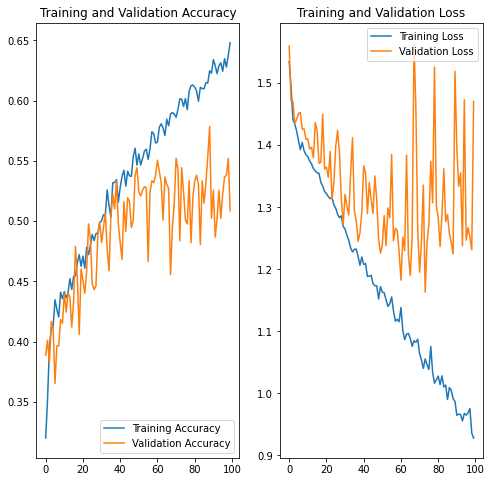

In [ ]:
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']
loss = training.history['loss']
val_loss = training.history['val_loss']
epochs_range = range(100)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict(test_x)
predictions

array([[2.6242372e-01, 3.9606911e-01, 7.7982368e-03, 2.5578892e-01,
        7.7919938e-02],
       [1.7517289e-06, 9.9992681e-01, 1.4086401e-06, 2.0601621e-05,
        4.9392449e-05],
       [1.5672616e-03, 9.6320617e-01, 8.9741740e-03, 5.5175927e-03,
        2.0734856e-02],
       ...,
       [2.4925041e-01, 5.9855171e-02, 4.5354432e-01, 1.5832062e-01,
        7.9029500e-02],
       [4.3824509e-01, 1.4685129e-01, 2.9305053e-01, 9.1578953e-02,
        3.0274097e-02],
       [1.6688622e-04, 9.9661934e-01, 6.1626131e-05, 2.1714931e-03,
        9.8068500e-04]], dtype=float32)

In [ ]:
y_preds = [np.argmax(i) for i in predictions]


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(test_y,y_preds))
print(metrics.classification_report(test_y,y_preds))

[[ 98  81   9  12   0]
 [ 15 174   4   7   0]
 [ 39  20  43  18   3]
 [ 12  51  19  30   1]
 [ 15  35   9  11   3]]
              precision    recall  f1-score   support

           0       0.55      0.49      0.52       200
           1       0.48      0.87      0.62       200
           2       0.51      0.35      0.42       123
           3       0.38      0.27      0.31       113
           4       0.43      0.04      0.07        73

    accuracy                           0.49       709
   macro avg       0.47      0.40      0.39       709
weighted avg       0.48      0.49      0.45       709



In [ ]:
classes=['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
               'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections']
               

In [ ]:
plt.imshow(train_x[100])
plt.show
print(classes[train_y[100]])

In [ ]:
from tensorflow.keras.preprocessing import image
test=train_x[100]
test=image.img_to_array(test)
test=test.reshape((-1,img_width, img_height,3))
predictions = model.predict(test)
predictions

array([[0.0165885 , 0.8776214 , 0.00109349, 0.08573822, 0.01895837]],
      dtype=float32)

In [ ]:
 classes[np.argmax(predictions)]

'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions'

In [ ]:
classes[train_y[100]]

'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions'

Acne and Rosacea Photos


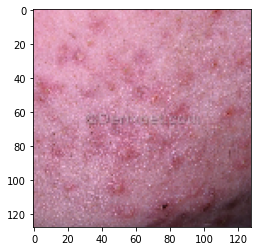

In [ ]:
plt.imshow(train_x[1200])
plt.show
print(classes[train_y[1200]])

In [ ]:
from tensorflow.keras.preprocessing import image
test=train_x[1200]
test=image.img_to_array(test)
test=test.reshape((-1,img_width, img_height,3))
predictions = model.predict(test)
predictions

array([[0.78493977, 0.02653016, 0.00481321, 0.05133453, 0.13238232]],
      dtype=float32)

In [ ]:
 classes[np.argmax(predictions)]

'Acne and Rosacea Photos'

In [ ]:
classes[train_y[1200]]

'Acne and Rosacea Photos'

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions


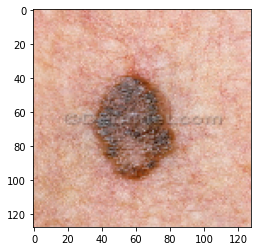

In [ ]:
plt.imshow(test_x[100])
plt.show
print(classes[test_y[100]])

In [ ]:
from tensorflow.keras.preprocessing import image
test=test_x[100]
test=image.img_to_array(test)
test=test.reshape((-1,img_width, img_height,3))
predictions = model.predict(test)
predictions

array([[4.2021708e-04, 9.9467623e-01, 1.5657595e-05, 4.0415260e-03,
        8.4636413e-04]], dtype=float32)

In [ ]:
classes[np.argmax(predictions)]

'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions'

In [ ]:
classes[test_y[100]]

'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions'